In [1]:
from ibm_quantum_widgets import CircuitComposer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg = QuantumRegister(3, 'q')
creg = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg, creg)

circuit.reset(qreg[0])
circuit.reset(qreg[1])
circuit.reset(qreg[2])

circuit.barrier(qreg[0], qreg[1], qreg[2])
circuit.h(qreg[0])
circuit.h(qreg[2])

circuit.barrier(qreg[0], qreg[1], qreg[2])
circuit.ry(3 * pi / 4, qreg[2])
circuit.ry(pi / 3, qreg[0])

circuit.barrier(qreg[0], qreg[1], qreg[2])
circuit.cx(qreg[0], qreg[1])
circuit.barrier(qreg[0], qreg[1], qreg[2])

#circuit.measure(qreg[0], creg[0])
#circuit.measure(qreg[1], creg[1])
#circuit.measure(qreg[2], creg[2])

In [3]:
editor = CircuitComposer(circuit=circuit)
editor

CircuitComposer(circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f015f0b3b80>)

In [4]:
from qiskit import IBMQ, QuantumCircuit, Aer, assemble, execute
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_distribution
from qiskit.visualization import array_to_latex

In [5]:
sim = Aer.get_backend('aer_simulator')

In [6]:
circuit_vector  = circuit.copy()
circuit_vector.save_statevector()
#qobj2 = assemble(circuit_vector)

result2 = sim.run(circuit_vector).result()
statevector2 = result2.get_statevector()

In [7]:
array_to_latex(statevector2, prefix="\\text{Output statevector = }")

<IPython.core.display.Latex object>

In [8]:
circuit.measure(qreg[0], creg[0])
circuit.measure(qreg[1], creg[1])
circuit.measure(qreg[2], creg[2])

In [9]:
job = execute(circuit, sim, shots=8192)  # shots default = 1024
result = job.result()
data = result.get_counts(circuit)

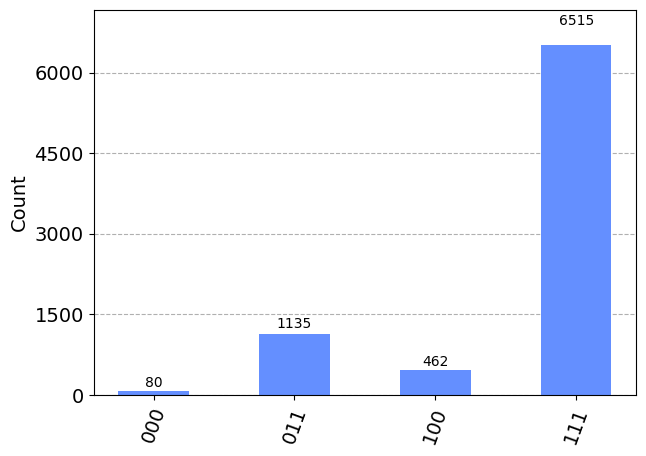

In [10]:
plot_histogram(data)

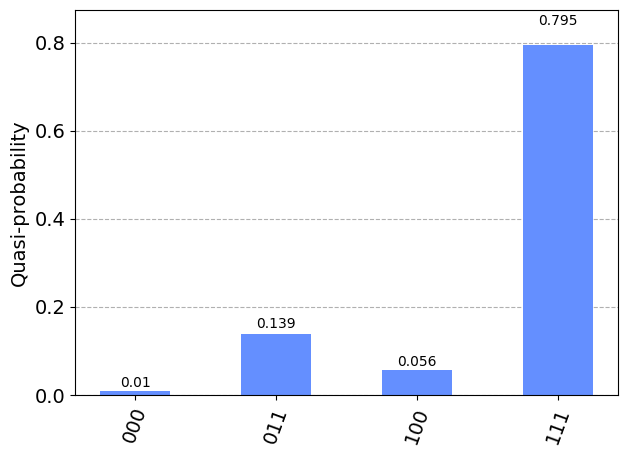

In [11]:
plot_distribution(data)